In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import GPyOpt
import GPy
from numba import jit

from bo import bayesianOptimization
from acquisitions import ei, rollout_utility_archive
from utils import minimize, gap

In [2]:
norm = True
objective_true  = GPyOpt.objective_examples.experiments2d.branin(bounds=[(0, 10), (0, 10)],normalized = norm)               # true function
objective_noisy = GPyOpt.objective_examples.experiments2d.branin(bounds=[(0, 10), (0, 10)],sd = 0.0001,normalized = norm)         # noisy version
bounds = objective_true.bounds     

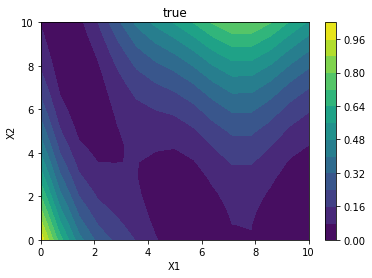

In [3]:
grid = 15
x1 = np.linspace(bounds[0][0], bounds[0][1], grid)
x2 = np.linspace(bounds[1][0], bounds[1][1], grid)
X1, X2 = np.meshgrid(x1, x2)
_X = np.hstack((X1.reshape(grid*grid,1),X2.reshape(grid*grid,1)))
_Y = objective_true.f(_X)

plt.figure()    
plt.contourf(X1, X2, _Y.reshape((grid,grid)),grid)
plt.colorbar()
plt.xlabel('X1')
plt.ylabel('X2')
plt.title("true")
plt.show()

In [4]:
objective_true.f(minimize(objective_true.f,bounds,grid=100))

array([[0.0114951]])

In [17]:
obj_f = objective_true.f
kernel = GPy.kern.RBF(2, ARD=True)
seed = 2
np.random.seed(seed=seed)

h=1
N_q=11
N = 10

n = 3
queriesei = {}
valuesei={}
gapsei=[]
queriesro = {}
valuesro={}
gapsro=[]

for i in range(10):
    print("n_ei",i)
    _query, _value = bayesianOptimization(obj_f,
                                          ei,
                                          bounds,
                                          kernel,
                                          depth_h = h,
                                          N = N,
                                          initial_n=1,
                                          N_q = N_q
                                          )
    queriesei[i] = _query
    valuesei[i] = _value
    gapsei.append(gap(_value))
    
for i in range(n):
    print("n_rollout", i)
    _query, _value = bayesianOptimization(obj_f,
                                          rollout_utility_archive,
                                          bounds,
                                          kernel,
                                          depth_h = h,
                                          N = N,
                                          initial_n=1,
                                          N_q = N_q,
                                          decay_rate=1.
                                          )
    queriesro[i] = _query
    valuesro[i] = _value
    gapsro.append(gap(_value))

n_ei 0
0
1
2
3
4
5
6
7
8
n_ei 1
0
1
2
3
4
5
6
7
8
n_ei 2
0
1
2
3
4
5
6
7
8
n_ei 3
0
1
2
3
4
5
6
7
8
n_ei 4
0
1
2
3
4
5
6
7
8
n_ei 5
0
1
2
3
4
5
6
7
8
n_ei 6
0
1
2
3
4
5
6
7
8
n_ei 7
0
1
2
3
4
5
6
7
8
n_ei 8
0
1
2
3
4
5
6
7
8
n_ei 9
0
1
2
3
4
5
6
7
8
n_rollout 0
0
1
2
3
4
5
6
7
8
n_rollout 1
0
1
2
3
4
5
6
7
8
n_rollout 2
0
1
2
3
4
5
6
7
8


In [25]:
gapsro

[0.0, 0.5955314206875402, 0.24125444607234411]

In [26]:
queriesro

{0: array([[ 5.0524609 ,  0.65286504],
        [ 4.44444444,  1.11111111],
        [ 6.66666667,  6.66666667],
        [10.        ,  2.22222222],
        [ 0.        ,  5.55555556],
        [10.        ,  3.33333333],
        [ 3.33333333,  3.33333333],
        [ 8.88888889,  7.77777778],
        [ 1.11111111,  5.55555556],
        [ 0.        ,  6.66666667]]), 1: array([[ 4.28122328,  0.96530916],
        [ 4.44444444,  1.11111111],
        [ 4.44444444,  3.33333333],
        [ 4.44444444,  2.22222222],
        [ 5.55555556,  5.55555556],
        [ 2.22222222,  1.11111111],
        [ 1.11111111,  2.22222222],
        [ 0.        ,  1.11111111],
        [ 3.33333333,  1.11111111],
        [10.        ,  0.        ]]), 2: array([[1.27159972, 5.96745309],
        [2.22222222, 6.66666667],
        [4.44444444, 7.77777778],
        [0.        , 7.77777778],
        [1.11111111, 6.66666667],
        [4.44444444, 6.66666667],
        [3.33333333, 3.33333333],
        [3.33333333, 4.44444444

In [27]:
import pickle
with open('rollout_h1Nq11r10.pickle', mode='wb') as f:
     pickle.dump(queriesro, f)

In [28]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

In [29]:
gapsro

[0.0, 0.5955314206875402, 0.24125444607234411]

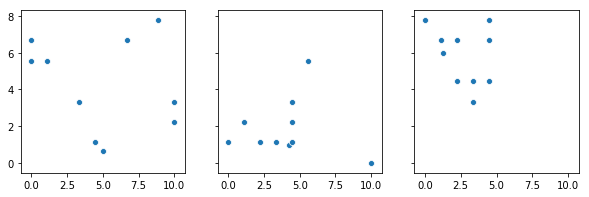

In [30]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3,sharex=True,sharey=True,figsize=(10,3))

sns.scatterplot(queriesro[0][:,0],queriesro[0][:,1], ax =ax1)
sns.scatterplot(queriesro[1][:,0],queriesro[1][:,1], ax =ax2)
sns.scatterplot(queriesro[2][:,0],queriesro[2][:,1], ax =ax3)

In [31]:
print("meanEI", np.mean(gapsei))
print("meanRO", np.mean(gapsro))

meanEI 0.6827046604933196
meanRO 0.2789286222532948
